### Problem statement
Regression: Simple Linear

Dataset: 1.01. Simple linear regression

Apply Data pre-processing (Label Encoding , Data Transformation....)
techniques if necessary.

Explore the relationship between students SAT score and GPA using
linear regression model. Also display the regression results and plot the
regression line.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math

In [5]:
df = pd.read_csv('../../all_datasets/Regression/1.01. Simple linear regression.csv')
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [6]:
x_train = df['SAT']
y_train = df['GPA']

In [7]:
# print x_train
x_train = x_train.values
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [1714 1664 1760 1685 1693]


In [8]:
# print y_train
y_train = y_train.values
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [2.4  2.52 2.54 2.74 2.83]


In [9]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (84,)
The shape of y_train is:  (84,)
Number of training examples (m): 84


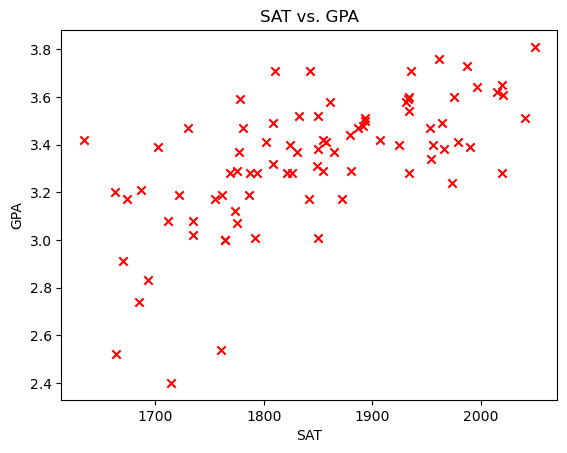

In [10]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("SAT vs. GPA")
# Set the y-axis label
plt.ylabel('GPA')
# Set the x-axis label
plt.xlabel('SAT')
plt.show()

### Cost function (squared error cost function)

In [11]:
def compute_cost(x, y, w, b):
    total_cost = 0
    
    # calculate number of training examples
    m = x.shape[0]

    # varialbe to keep track of cost for each example
    cost_sum = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
    
    total_cost = (1/(2*m)) * cost_sum

    return total_cost

- To check your cost function implementation we can run below code

In [12]:
initial_w = 0.001
initial_b = 0.02

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(f'Cost with initial values of w and b: {cost:.3f}')

Cost with initial values of w and b: 1.097


- We need to find the value of w and b such that cost obtained is as minimum as possible.
- Thats why we will use gradient descent to find value of w and b

In [13]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model  
    Returns
        dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
        dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """

    m = x.shape[0]

    
    # return below variables
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b

        dj_dw_i = (f_wb - y[i])* x[i]
        dj_db_i = f_wb - y[i]

        #update the dj_dw and dj_db
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [14]:
initial_w = 0.2
initial_b = 0.2

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): 677372.3802380953 365.9245238095238


#### Learning parameters using batch gradient descent 

You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [15]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iter):
    m = len(x)
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iter):
        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db 

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iter/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
x_train = x_train.reshape(-1, 1)
x_norm = scaler.fit_transform(x_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[416]
Peak to Peak range by column in Normalized X:[4.00359586]


In [38]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w =0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_norm ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     5.47   
Iteration  150: Cost     0.29   
Iteration  300: Cost     0.03   
Iteration  450: Cost     0.02   
Iteration  600: Cost     0.02   
Iteration  750: Cost     0.02   
Iteration  900: Cost     0.02   
Iteration 1050: Cost     0.02   
Iteration 1200: Cost     0.02   
Iteration 1350: Cost     0.02   
w,b found by gradient descent: [0.17203685] [3.33023715]


We will now use the final parameters from gradient descent to plot the linear fit. 

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [39]:
m = x_norm.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_norm[i] + b

In [43]:
predicted

array([3.11288873, 3.03010436, 3.18905036, 3.06487379, 3.0781193 ,
       3.04003848, 3.19567311, 3.19567311, 3.24203237, 3.33806225,
       3.14765817, 3.21388568, 3.14765817, 3.10957736, 3.2105743 ,
       3.37448737, 3.18077193, 3.04666123, 3.32481674, 3.23209824,
       3.19070605, 3.12613424, 3.02844867, 3.06818517, 3.54336751,
       3.29832574, 3.23375393, 3.29004731, 3.61952913, 3.24534374,
       3.20395155, 3.47714   , 3.21388568, 3.34634068, 3.38773287,
       3.33640656, 3.26852337, 3.51025375, 3.21719705, 3.30660418,
       3.36289756, 3.33806225, 3.530122  , 3.09302048, 3.56985851,
       3.46223881, 3.29501437, 3.51356513, 3.34965206, 3.55164594,
       3.25858924, 3.34634068, 3.43243644, 2.98043373, 3.38607719,
       3.39932269, 3.13937974, 3.50859807, 3.2238198 , 3.40594544,
       3.52681063, 3.26852337, 3.40925681, 3.65429857, 3.40925681,
       3.30825987, 3.33806225, 3.47714   , 3.35627481, 3.47217294,
       3.47548431, 3.21885274, 3.54502319, 3.47714   , 3.62118

Text(0.5, 0, 'SAT')

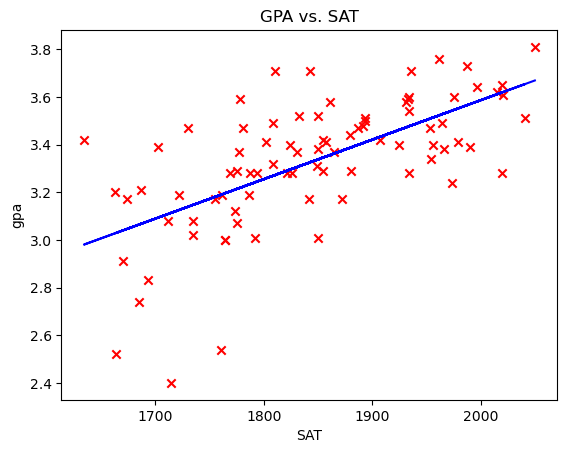

In [40]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("GPA vs. SAT")
# Set the y-axis label
plt.ylabel('gpa')
# Set the x-axis label
plt.xlabel('SAT')

In [49]:
def predict(n):
    return (w*n+b )*0.01

In [50]:
predict(1714)

array([2.98201404])

In [48]:
gpa = w * 1714 + b
print(gpa * 0.01)


[2.98201404]
